In [1]:
from IPython.display import HTML, Image
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [2]:
historical_gdp = pd.read_html('https://en.wikipedia.org/wiki/Economic_history_of_the_United_States#GDP')[6]
historical_gdp.columns = ['Year',
              'Nominal GDP',
              'Adjusted GDP',
              'Population',
              'Nominal GDP Per Capita',
              'Adjusted GDP Per Capita']
historical_gdp['Inverse Population'] = ((historical_gdp['Population'] - historical_gdp['Population'].mean()) * -1) + 200
historical_gdp['Population_Scaled'] = (historical_gdp['Population'] - historical_gdp['Population'].min()) / (historical_gdp['Population'].max() - historical_gdp['Population'].min())
historical_gdp.head()

,Year,Nominal GDP,Adjusted GDP,Population,Nominal GDP Per Capita,Adjusted GDP Per Capita,Inverse Population,Population_Scaled
0,1790,0.19,3.60,3.929,48,916,294.326281,0.000000
1,1791,0.21,3.82,4.048,52,944,294.207281,0.000402
2,1792,0.22,4.10,4.171,53,983,294.084281,0.000817
3,1793,0.25,4.43,4.297,58,1031,293.958281,0.001243
4,1794,0.31,5.00,4.428,70,1129,293.827281,0.001686


# Week Nine: Relationships Between Variables

# Single Variable

* Thus far, everything we've looked at has been in the context of a single variable.
* We can look at a distribution of the annual history of population in America and visualize it.

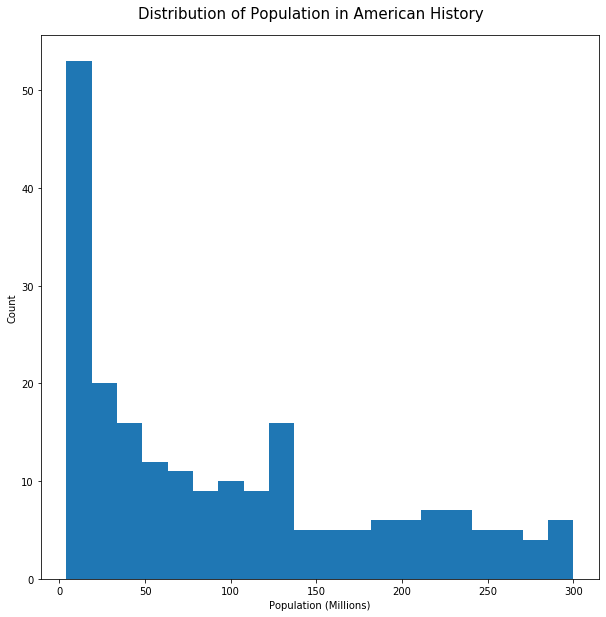

In [3]:
fig = plt.figure(figsize=(10,10))
plt.hist(historical_gdp['Population'], bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Single Variable

* Or we can look at a distribution of the annual history of GDP per capita in America and visualize it.

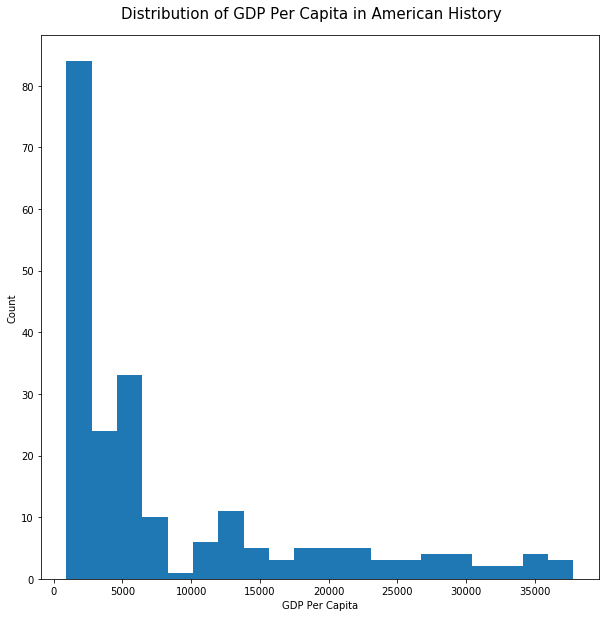

In [4]:
fig = plt.figure(figsize=(10,10))
plt.hist(historical_gdp['Adjusted GDP Per Capita'], bins=20)
plt.xlabel('GDP Per Capita')
plt.ylabel('Count')
fig.suptitle('Distribution of GDP Per Capita in American History', fontsize=15, y=0.92)

hide_toggle()

# Two Variables

* But what about the relationship between these two variables?

# Covariance

* **Covariance** is a measure of the tendency of two corresponding continuous variables to vary together
* For instance, if the X variable is greater than the mean of X while the corresponding Y variable is greater than the mean of Y, the two variables will have a positive covariance.


$$
\operatorname{Cov}(X, Y)=\frac{\sum\left(X_{i}-\bar{X}\right)\left(Y_{j}-\bar{Y}\right)}{n}
$$

# Covariance

* **Covariance** is a measure of the tendency of two corresponding continuous variables to vary together
* If the X variable is less than the mean of X while the corresponding Y variable is less than the mean of Y, the two variables will have a positive covariance.

$$
\operatorname{Cov}(X, Y)=\frac{\sum\left(X_{i}-\bar{X}\right)\left(Y_{j}-\bar{Y}\right)}{n}
$$

# Covariance

* **Covariance** is a measure of the tendency of two continuous variables to vary together
* If the X variable is less than the mean of X while the corresponding Y variable is greater than the mean of Y, or vice versa, the two variables will have a negative covariance.


# Correlation

* **Pearson's Correlation** scales the covariance value between -1 and 1 by dividng the covariance value by the product of the standard deviations of each variable
* If correlation is positive, we know that when one variable is relatively high, the other tends to be relatively high
* If correlation is negative, we know that when one variable is relatively low, the other variable tends to be relatively low


$$
\operatorname{Cor}(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sigma_{x} \sigma_{y}}
$$

In [5]:
correlation_values = [-1, -0.7, -0.5, -0.3, 0, 0.3, 0.5, 0.7, 1]
meaning = ['Perfect Negative Correlation',
           'Strong Negative Correlation',
           'Moderate Negative Correlation',
           'Weak Negative Correlation',
           'No Linear Relationship',
           'Weak Positive Correlation',
           'Moderate Positive Correlation',
           'Strong Positive Correlation',
           'Perfect Positive Correlation']
correlation_values_df = pd.DataFrame()
correlation_values_df['Correlation'] = correlation_values
correlation_values_df['Meaning'] = meaning

In [6]:
correlation_values_df

,Correlation,Meaning
0,-1.0,Perfect Negative Correlation
1,-0.7,Strong Negative Correlation
2,-0.5,Moderate Negative Correlation
3,-0.3,Weak Negative Correlation
4,0.0,No Linear Relationship
5,0.3,Weak Positive Correlation
6,0.5,Moderate Positive Correlation
7,0.7,Strong Positive Correlation
8,1.0,Perfect Positive Correlation


# Correlation

* Say we have the heights and weights of five people. What is the covariance and correlation of their height and weight?

In [7]:
heights = [66, 70, 76, 62, 69]
weights = [125, 160, 240, 250, 155]
index_values = ['Person 1', 'Person 2', 'Person 3', 'Person 4', 'Person 5']
heights_and_weights = pd.DataFrame()
heights_and_weights['Height'] = heights
heights_and_weights['Weight'] = weights
heights_and_weights['Height Deviation'] = heights_and_weights['Height'] - heights_and_weights['Height'].mean()
heights_and_weights['Weight Deviation'] = heights_and_weights['Weight'] - heights_and_weights['Weight'].mean()
heights_and_weights['Height Diff * Weight Diff'] = heights_and_weights['Height Deviation'] * heights_and_weights['Weight Deviation']
heights_and_weights['Height Rank'] = heights_and_weights['Height'].rank()
heights_and_weights['Weight Rank'] = heights_and_weights['Weight'].rank()
heights_and_weights['Height Rank Deviation'] = heights_and_weights['Height Rank'] - heights_and_weights['Height Rank'].mean()
heights_and_weights['Weight Rank Deviation'] = heights_and_weights['Weight Rank'] - heights_and_weights['Weight Rank'].mean()
heights_and_weights['Height Rank Diff * Weight Rank Diff'] = heights_and_weights['Height Rank Deviation'] * heights_and_weights['Weight Rank Deviation']
heights_and_weights.index = index_values

In [8]:
print('Expected Height:', heights_and_weights['Height'].mean())
print('Expected Weight:', heights_and_weights['Weight'].mean())
heights_and_weights[['Height', 'Weight']]

Expected Height: 68.6
Expected Weight: 186.0


,Height,Weight
Person 1,66,125
Person 2,70,160
Person 3,76,240
Person 4,62,250
Person 5,69,155


In [9]:
print('Expected Height:', heights_and_weights['Height'].mean())
print('Expected Weight:', heights_and_weights['Weight'].mean())
heights_and_weights[['Height', 'Weight', 'Height Deviation', 'Weight Deviation']]

Expected Height: 68.6
Expected Weight: 186.0


,Height,Weight,Height Deviation,Weight Deviation
Person 1,66,125,-2.6,-61.0
Person 2,70,160,1.4,-26.0
Person 3,76,240,7.4,54.0
Person 4,62,250,-6.6,64.0
Person 5,69,155,0.4,-31.0


In [10]:
print('Covariance', np.round(heights_and_weights['Height Diff * Weight Diff'].mean(), 2))
heights_and_weights[['Height', 'Weight', 'Height Deviation', 'Weight Deviation', 'Height Diff * Weight Diff']]

Covariance 17.4


,Height,Weight,Height Deviation,Weight Deviation,Height Diff * Weight Diff
Person 1,66,125,-2.6,-61.0,158.6
Person 2,70,160,1.4,-26.0,-36.4
Person 3,76,240,7.4,54.0,399.6
Person 4,62,250,-6.6,64.0,-422.4
Person 5,69,155,0.4,-31.0,-12.4


In [11]:
print('Covariance', np.round(heights_and_weights['Height Diff * Weight Diff'].mean(), 2))
print('Height Deviation', np.round(np.std(heights_and_weights['Height Deviation']), 2))
print('Weight Deviation', np.round(np.std(heights_and_weights['Weight Deviation']), 2))
heights_and_weights

Covariance 17.4
Height Deviation 4.63
Weight Deviation 49.74


,Height,Weight,Height Deviation,Weight Deviation,Height Diff * Weight Diff,Height Rank,Weight Rank,Height Rank Deviation,Weight Rank Deviation,Height Rank Diff * Weight Rank Diff
Person 1,66,125,-2.6,-61.0,158.6,2.0,1.0,-1.0,-2.0,2.0
Person 2,70,160,1.4,-26.0,-36.4,4.0,3.0,1.0,0.0,0.0
Person 3,76,240,7.4,54.0,399.6,5.0,4.0,2.0,1.0,2.0
Person 4,62,250,-6.6,64.0,-422.4,1.0,5.0,-2.0,2.0,-4.0
Person 5,69,155,0.4,-31.0,-12.4,3.0,2.0,0.0,-1.0,-0.0


In [12]:
print('Covariance', np.round(heights_and_weights['Height Diff * Weight Diff'].mean(), 2))
print('Height Standard Deviation', np.round(np.std(heights_and_weights['Height Deviation']), 2))
print('Weight Standard Deviation', np.round(np.std(heights_and_weights['Weight Deviation']), 2))
print('Correlation', np.round((17.4)/(4.63 * 49.74), 4), 'Extremely Weak Positive Correlation')
heights_and_weights[['Height', 'Weight', 'Height Deviation', 'Weight Deviation', 'Height Diff * Weight Diff']]

Covariance 17.4
Height Standard Deviation 4.63
Weight Standard Deviation 49.74
Correlation 0.0756 Extremely Weak Positive Correlation


,Height,Weight,Height Deviation,Weight Deviation,Height Diff * Weight Diff
Person 1,66,125,-2.6,-61.0,158.6
Person 2,70,160,1.4,-26.0,-36.4
Person 3,76,240,7.4,54.0,399.6
Person 4,62,250,-6.6,64.0,-422.4
Person 5,69,155,0.4,-31.0,-12.4


# Scatterplots

* A scatterplot is a great way to visualize the relationship between two variables and should be done before calculating the covariance and correlation

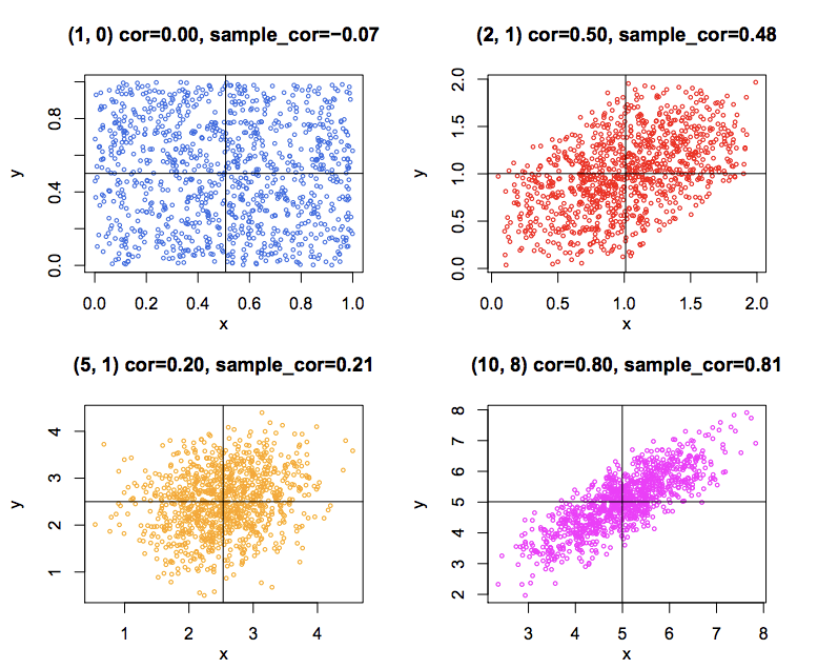

In [13]:
Image("data/scatterplots.png")

# Correlation

* While Pearson's correlation metric is a great way of measuring **linear relationships**, it doesn't capture non-linear relationships as well.

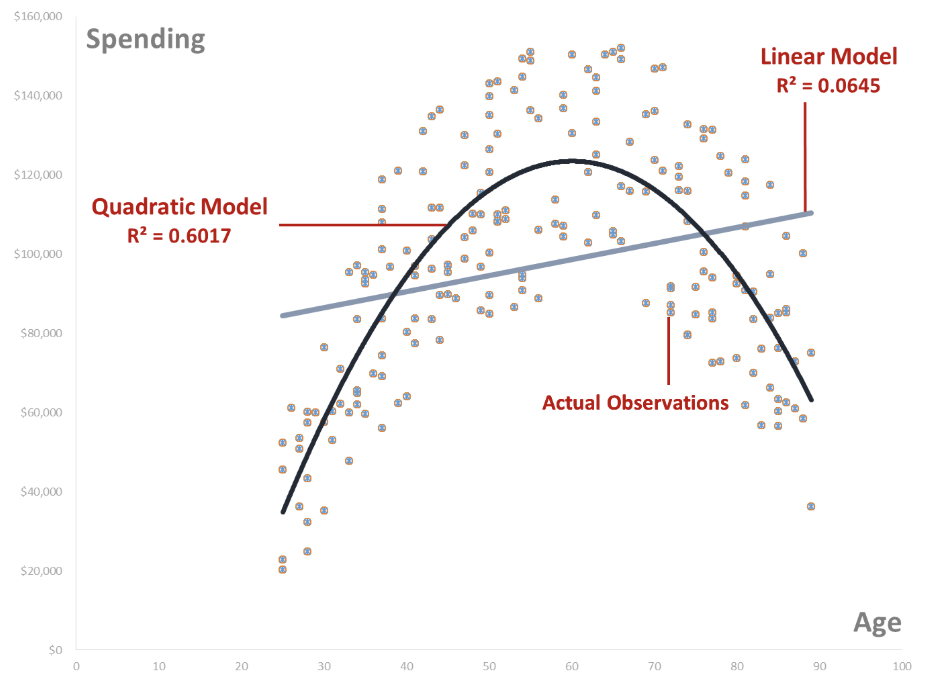

In [14]:
Image('data/linear_relationship.png')

# Correlation

* While Pearson's correlation metric is a great way of measuring **linear relationships**, it doesn't capture non-linear relationships as well.
* There are two ways to solve this. First, we can **transform** our data to make the relationship linear.

# Transformation

* Transformation in this case largely involves unskewing skewed data.
* A continuous distribution where more data is clustered around the lower end of the distribution is **positively skewed**.
* A continuous distribution where more data is clustered around the higher end of the distribution is **negatively skewed**.

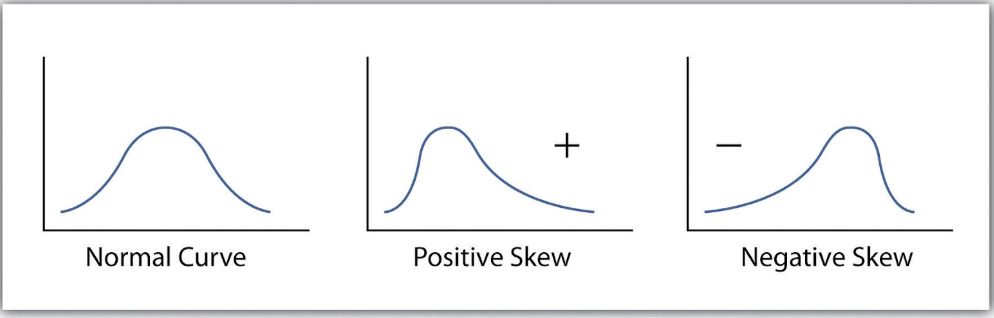

In [15]:
Image('data/skewed_data.png')

# Transformation

* Some common ways to transform data that is positively skewed are taking the log of the data, the square root of the data, or the square cube of the data.
* Generally we want to normalize the data, though it is up to us to experiment with different methods to ensure this happens.
* The below distribution of population in American history is **positively skewed**.


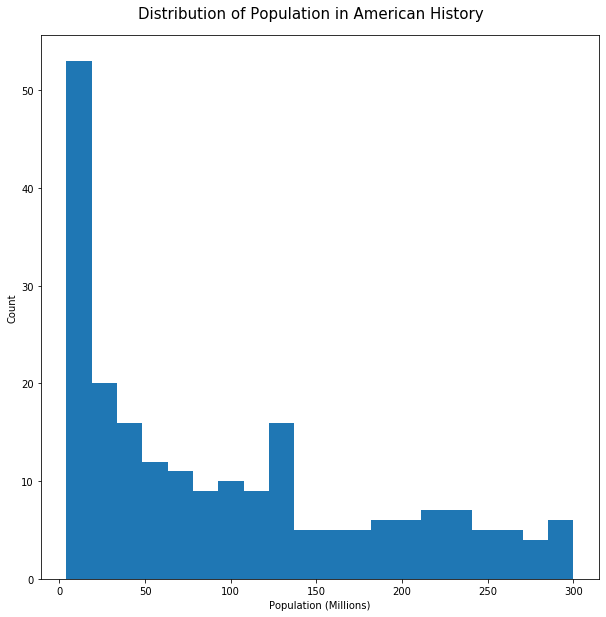

In [16]:
fig = plt.figure(figsize=(10,10))
plt.hist(historical_gdp['Population'], bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Below we have taken the **square root** of the original distribution.
* While there is still somewhat of a skew, the distribution is much closer to normal.

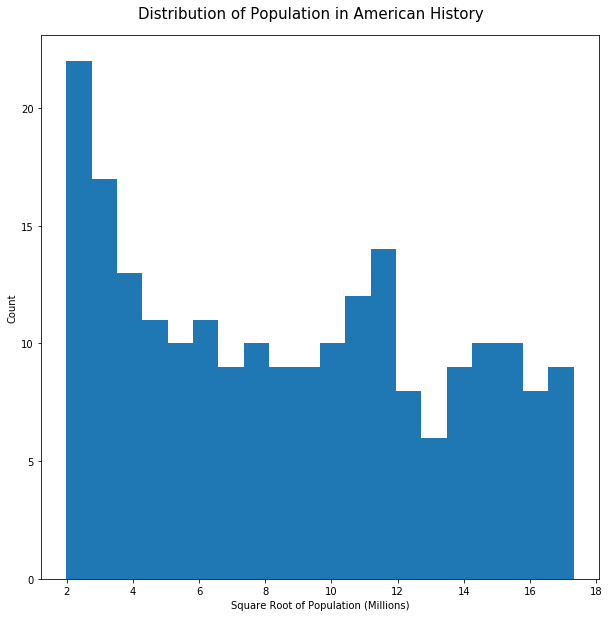

In [17]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.sqrt(historical_gdp['Population']), bins=20)
plt.xlabel('Square Root of Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Below we have taken the **square cube** of the original distribution.
* This distribution is even less skewed than the square root of the original distribution.

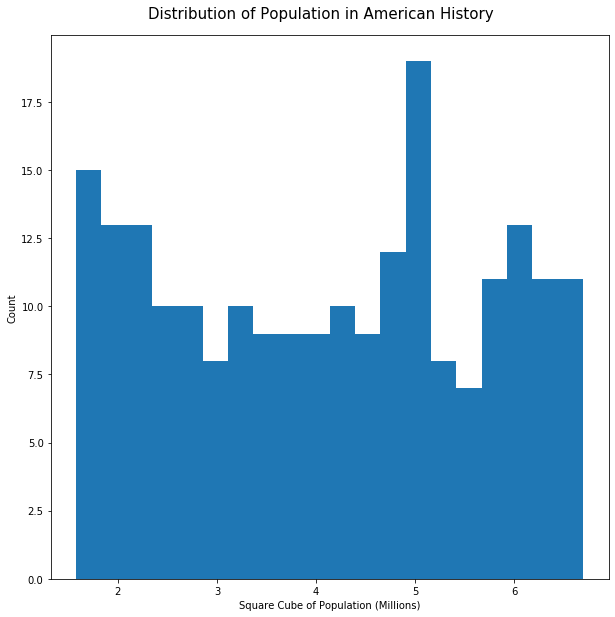

In [18]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.power(historical_gdp['Population'], 1/3), bins=20)
plt.xlabel('Square Cube of Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Below we have taken the **log** of the original distribution.
* Now the distribution is negatively skewed.

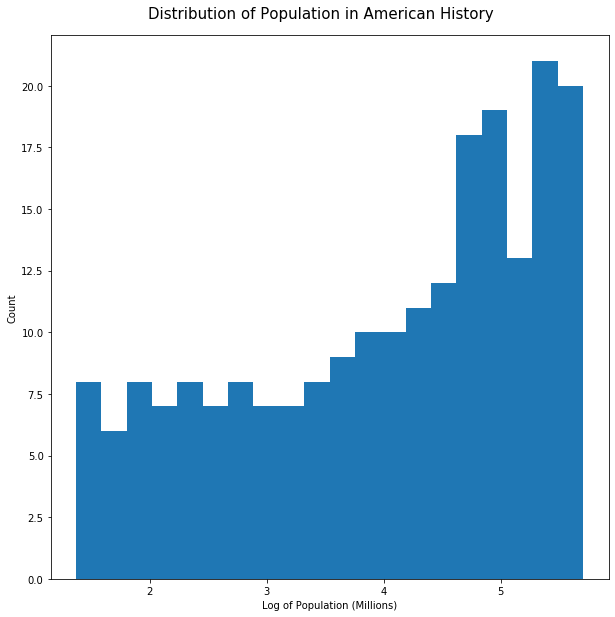

In [19]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(historical_gdp['Population']), bins=20)
plt.xlabel('Log of Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Some common ways to transform data that is **negatively skewed** are squaring the data, cubing the data, and getting the exponential 
* Generally we want to normalize the data, though it is up to us to experiment with different methods to ensure this happens.
* The below inverse distribution of population in American history is **negatively skewed**.

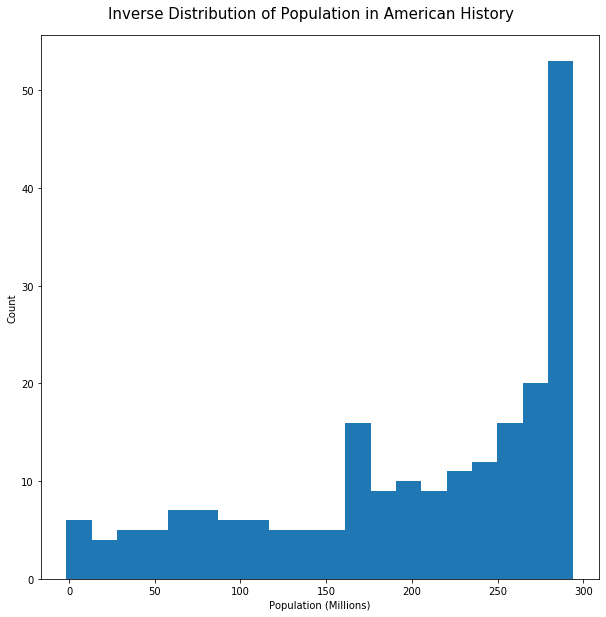

In [20]:
fig = plt.figure(figsize=(10,10))
plt.hist(historical_gdp['Inverse Population'], bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Inverse Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Below we have **squared** the original distribution.
* While the distribution isn't normal, per se, it removes the negative skew.

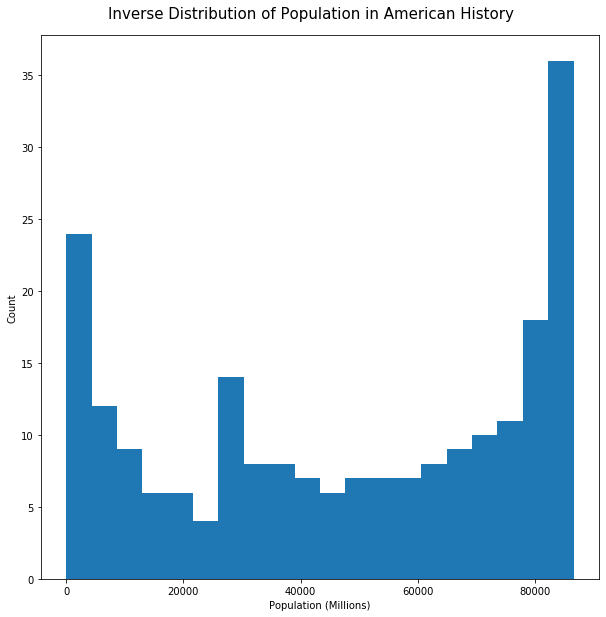

In [21]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.power(historical_gdp['Inverse Population'], 2), bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Inverse Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Below we have **cubed** the original distribution.
* There isn't much of a difference here between the distribution of the squared distribution and the cubed distribution.

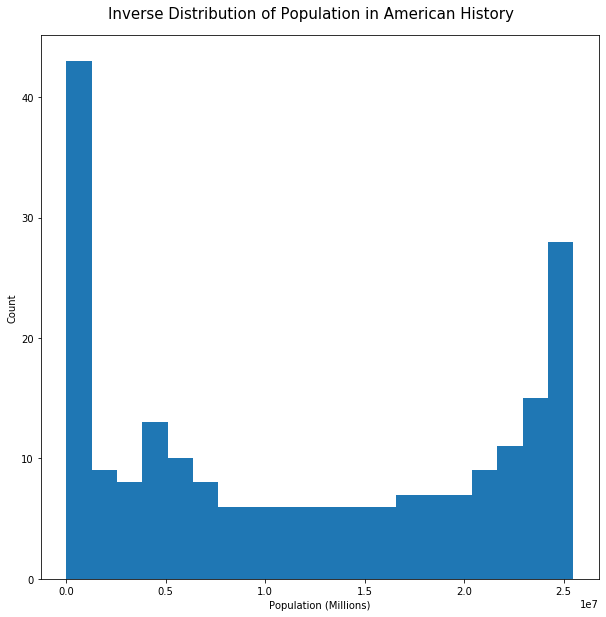

In [22]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.power(historical_gdp['Inverse Population'], 3), bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Inverse Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Below we have **taken the exponent** of the original distribution.
* Clearly the data is now heavily positively skewed.

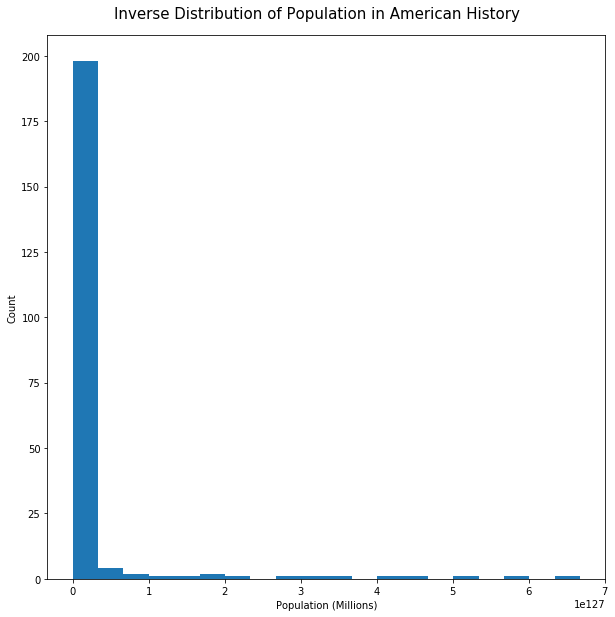

In [23]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.exp(historical_gdp['Inverse Population']), bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Inverse Distribution of Population in American History', fontsize=15, y=0.92)

hide_toggle()

# Transformation

* Below is the relationship between population and GDP in America, with both variables not being transformed.


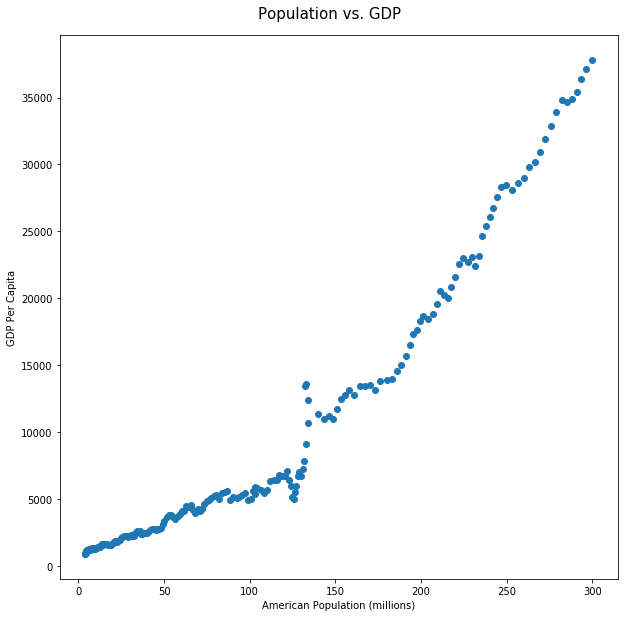

In [24]:
fig = plt.figure(figsize=(10,10))
plt.scatter(historical_gdp['Population'], historical_gdp['Adjusted GDP Per Capita'])
plt.xlabel('American Population (millions)')
plt.ylabel('GDP Per Capita')
fig.suptitle('Population vs. GDP', fontsize=15, y=0.92)

hide_toggle()

In [25]:
print('Correlation:', np.round(stats.pearsonr(historical_gdp['Population'], historical_gdp['Adjusted GDP Per Capita'])[0], 4))

Correlation: 0.9581


# Transformation

* While this isn’t as extreme as the example shown earlier, note that the true relationship appears to be nonlinear and most of the data points are clustered at the lower end of the distribution
* The correlation between these two values is 0.95, which is close to a **perfect positive correlation**.
* The problem with this is that Pearson's correlation assumes a linear relaationship. If we were to build a regression model based off of this correlation, it would be incorrect.

In [26]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals
slope, intercept, predictions, residuals = evaluate_linear_relationship(historical_gdp['Population'], historical_gdp['Adjusted GDP Per Capita'])
sorted_order = np.argsort(historical_gdp['Population'])

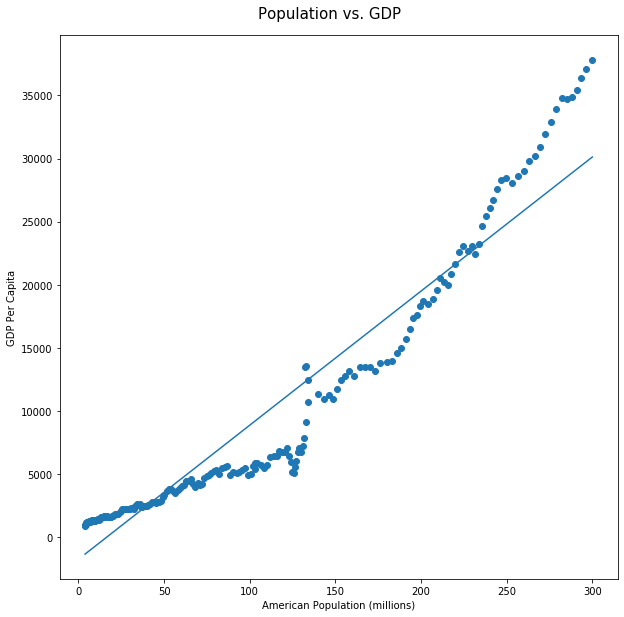

In [27]:
fig = plt.figure(figsize=(10,10))
plt.scatter(historical_gdp['Population'], historical_gdp['Adjusted GDP Per Capita'])
plt.plot(historical_gdp['Population'][sorted_order], predictions[sorted_order])
plt.xlabel('American Population (millions)')
plt.ylabel('GDP Per Capita')
fig.suptitle('Population vs. GDP', fontsize=15, y=0.92)

hide_toggle()


* Above we can see that the regression created by the correlation doesn't quite capture the relationship of these two variables.

# Transformation

* Now we'll see the relationship between our transformed variables - specifically the square root of the population metric and the log value of the historal GDP metric.

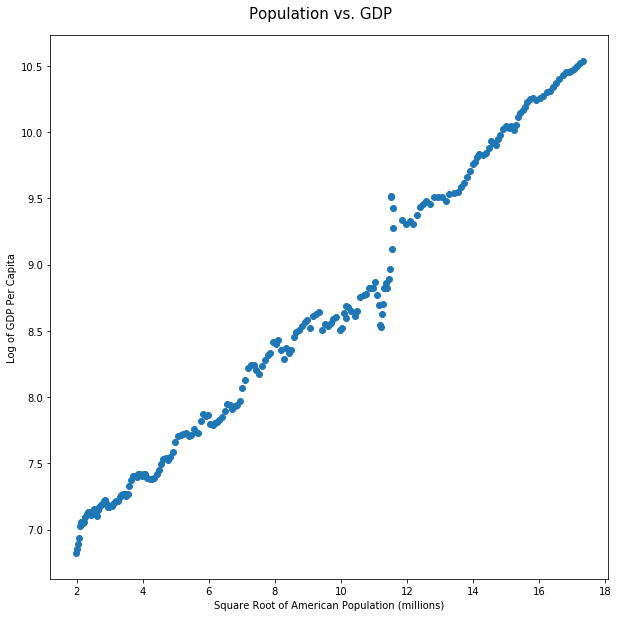

In [28]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.sqrt(historical_gdp['Population']), np.log(historical_gdp['Adjusted GDP Per Capita']))
plt.xlabel('Square Root of American Population (millions)')
plt.ylabel('Log of GDP Per Capita')
fig.suptitle('Population vs. GDP', fontsize=15, y=0.92)

hide_toggle()

In [29]:
print('Correlation:', np.round(stats.pearsonr(np.sqrt(historical_gdp['Population']), np.log(historical_gdp['Adjusted GDP Per Capita']))[0], 4))

Correlation: 0.9934


In [30]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(np.sqrt(historical_gdp['Population']), np.log(historical_gdp['Adjusted GDP Per Capita']))
sorted_order = np.argsort(np.sqrt(historical_gdp['Population']))

# Transformation

* The correlation here is higher, but more importantly, the two variables now have a linear relationship as evidenced by the below regression line.

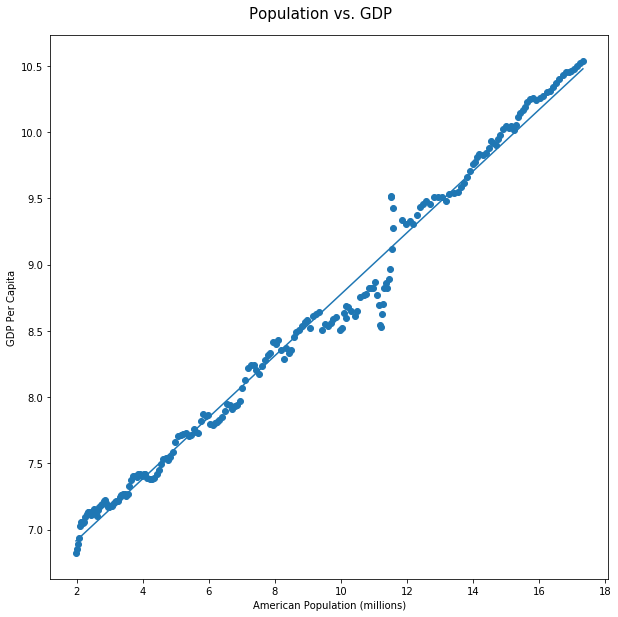

In [31]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.sqrt(historical_gdp['Population']), np.log(historical_gdp['Adjusted GDP Per Capita']))
plt.plot(np.sqrt(historical_gdp['Population'][sorted_order]), predictions[sorted_order])
plt.xlabel('American Population (millions)')
plt.ylabel('GDP Per Capita')
fig.suptitle('Population vs. GDP', fontsize=15, y=0.92)

hide_toggle()

# Scaling and Shifting

* There are several options to scale your data. One popular option is **Min-Max normalization**, which will rescale your data so that all of the values lie between 0 and 1.

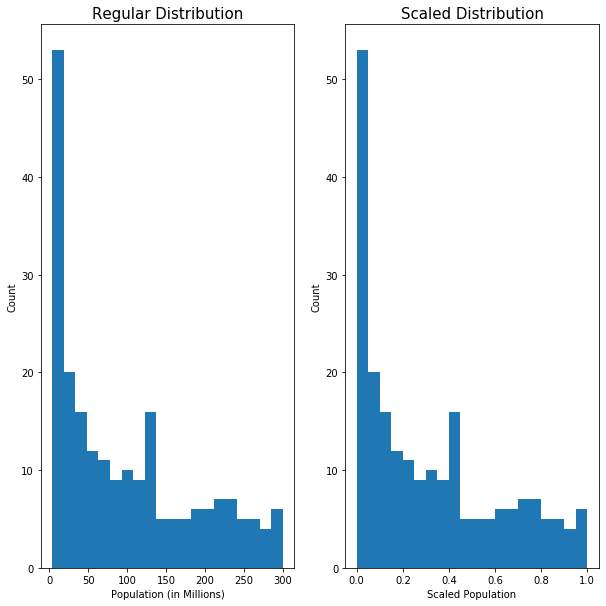

In [32]:
fig, ax=plt.subplots(1,2, figsize=(10,10))
#fig = plt.figure(figsize=(10,10))
ax[0].hist(historical_gdp['Population'], bins=20)
ax[1].hist(historical_gdp['Population_Scaled'], bins=20)
ax[0].set_xlabel('Population (in Millions)')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Scaled Population')
ax[1].set_ylabel('Count')
ax[0].set_title('Regular Distribution', fontsize=15, y=1)
ax[1].set_title('Scaled Distribution', fontsize=15, y=1)

hide_toggle()

# Scaling and Shifting

* There are several options to scale your data. One popular option is **Min-Max normalization**, which will rescale your data so that all of the values lie between 0 and 1.
* This is a good technique to know for other machine algorithims, but is not necessary for linear regression.
* One use case of this for your project may be if your data has negative numbers, making certain types of transformations impossible.

# Transformation

* Don't spend a lot of time looking for the perfect transformation, use your judgment as to what makes sense.
* Understand the limitations of different transformation methods - for example you can't take the square root of a negative number, or get the log of 0 or a negative number. Consider re-scaling your data or removing 0 values if possible.

# Correlation

* **Spearman’s Rank Correlation** is an alternative way of calculating correlation that mitigates the effect of outliers and skewed distributions 
* Rather than calculate the correlation of the values of two variables, we calculate the correlation of the ranks of two variables 
* We calculate the correlation (and covariance) in the same manner we did previously, just with our ranked variables rather than the original variables.
* This method is not as susceptible to outliers, and does not require the relationship between the two distributions to be linear.
* It is a good method to capture nonlinear correlation, but not a means of prediction.


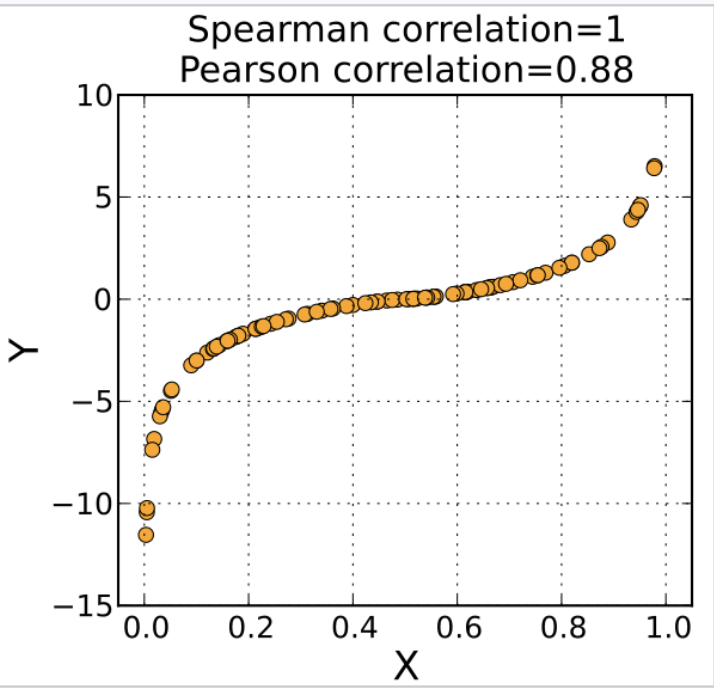

In [33]:
Image('data/spearman_pearson_1.png')

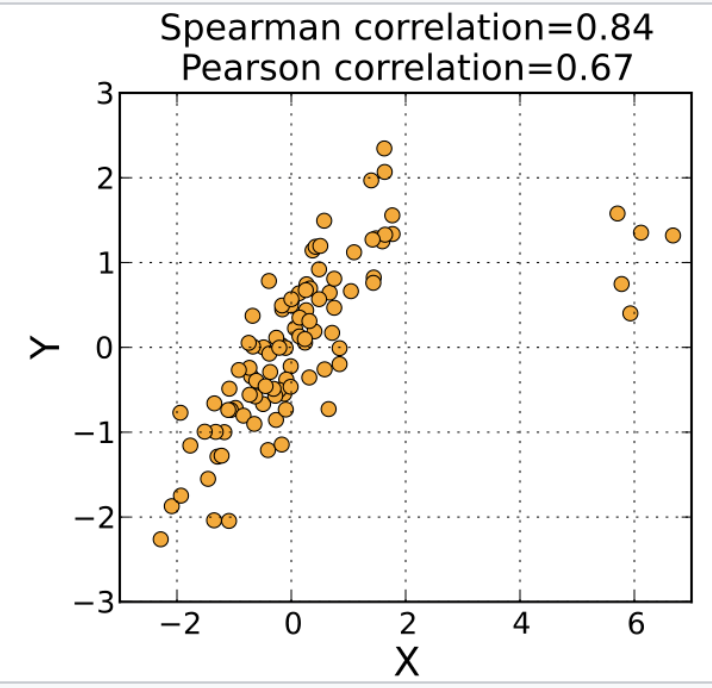

In [34]:
Image('data/spearman_pearson_2.png')

Below are the ranked values for each of the values in our heights and weights dataset.

In [35]:
heights_and_weights[['Height', 'Weight', 'Height Rank', 'Weight Rank']]

,Height,Weight,Height Rank,Weight Rank
Person 1,66,125,2.0,1.0
Person 2,70,160,4.0,3.0
Person 3,76,240,5.0,4.0
Person 4,62,250,1.0,5.0
Person 5,69,155,3.0,2.0


In [36]:
print('Expected Height Rank:', heights_and_weights['Height Rank'].mean())
print('Expected Weight Rank:', heights_and_weights['Weight Rank'].mean())
heights_and_weights[['Height', 'Weight', 'Height Rank', 'Weight Rank', 'Height Rank Deviation', 'Weight Rank Deviation']]

Expected Height Rank: 3.0
Expected Weight Rank: 3.0


,Height,Weight,Height Rank,Weight Rank,Height Rank Deviation,Weight Rank Deviation
Person 1,66,125,2.0,1.0,-1.0,-2.0
Person 2,70,160,4.0,3.0,1.0,0.0
Person 3,76,240,5.0,4.0,2.0,1.0
Person 4,62,250,1.0,5.0,-2.0,2.0
Person 5,69,155,3.0,2.0,0.0,-1.0


In [37]:
print('Covariance', np.round(heights_and_weights['Height Rank Diff * Weight Rank Diff'].mean(), 2))
heights_and_weights[['Height', 'Weight', 'Height Rank', 'Weight Rank', 'Height Rank Deviation', 'Weight Rank Deviation', 'Height Rank Diff * Weight Rank Diff']]

Covariance 0.0


,Height,Weight,Height Rank,Weight Rank,Height Rank Deviation,Weight Rank Deviation,Height Rank Diff * Weight Rank Diff
Person 1,66,125,2.0,1.0,-1.0,-2.0,2.0
Person 2,70,160,4.0,3.0,1.0,0.0,0.0
Person 3,76,240,5.0,4.0,2.0,1.0,2.0
Person 4,62,250,1.0,5.0,-2.0,2.0,-4.0
Person 5,69,155,3.0,2.0,0.0,-1.0,-0.0


In [38]:
print('Covariance', np.round(heights_and_weights['Height Rank Diff * Weight Rank Diff'].mean(), 2))
print('Height Rank Standard Deviation', np.round(np.std(heights_and_weights['Height Rank Deviation']), 2))
print('Weight Rank Standard Deviation', np.round(np.std(heights_and_weights['Weight Rank Deviation']), 2))
print('Correlation', np.round((0)/(1.41 * 1.41), 4), 'No Correlation')
heights_and_weights[['Height', 'Weight', 'Height Rank', 'Weight Rank', 'Height Rank Deviation', 'Weight Rank Deviation', 'Height Rank Diff * Weight Rank Diff']]

Covariance 0.0
Height Rank Standard Deviation 1.41
Weight Rank Standard Deviation 1.41
Correlation 0.0 No Correlation


,Height,Weight,Height Rank,Weight Rank,Height Rank Deviation,Weight Rank Deviation,Height Rank Diff * Weight Rank Diff
Person 1,66,125,2.0,1.0,-1.0,-2.0,2.0
Person 2,70,160,4.0,3.0,1.0,0.0,0.0
Person 3,76,240,5.0,4.0,2.0,1.0,2.0
Person 4,62,250,1.0,5.0,-2.0,2.0,-4.0
Person 5,69,155,3.0,2.0,0.0,-1.0,-0.0


# Common Mistakes with Correlations

* Over time, ice cream consumption is correlated with the rate of pool drownings. Eating ice cream will make you drown in the pool!

# Common Mistakes with Correlations

* Over time, ice cream consumption is correlated with the rate of pool drownings. Eating ice cream will make you drown in the pool!

* Both of these things happen at the same type of year, but one has nothing to do with the other. Correlation does not imply causation!

# Common Mistakes with Correlations

* People who formerly smoked are more likely to die of lung cancer than people who currently smoke. If you’re a smoker, DON’T QUIT.


# Common Mistakes with Correlations

* People who formerly smoked are more likely to die of lung cancer than people who currently smoke. If you’re a smoker, DON’T QUIT.
* When lifelong smokers find out they have lung cancer, they quit smoking and become former smokers. This is called **reverse causation**.


# Common Mistakes with Correlations

* Golfers are more prone to heart disease, cancer, and arthritis than the general population. Golf is bad for you!

# Common Mistakes with Correlations

* Golfers are more prone to heart disease, cancer, and arthritis than the general population. Golf is bad for you!
* Golfers tend to be older than the general population, and older people are more prone to these diseases than the rest of the general population. This is called **omitted variable bias**.

# Causation

* Given these common fallacies, how do we actually prove evidence of causation?
* The best way is a randomized control trial, where subjects are assigned randomly to two groups: a treatment group and a control group
* This is used in laboratory sciences, medicine, and a few other disciplines
* It is much harder to replicate outside of these instances for both ethical, financial and practical reasons


# Causation

* A natural experiment is when the split between a treatment and control group occurs naturally, such as examining differences between people from different countries or education levels
* Of course, the other fallacies we spoke about earlier may apply